In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#데이터셋 
from keras.datasets import boston_housing
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
train_data.sha

(404, 13)

In [4]:
mean= train_data.mean(axis=0)


In [5]:
train_data-=mean


In [7]:
std=train_data.std(axis=0)

In [ ]:
train_data=train_data/std

In [8]:
train_data

array([[ -2.51264057, -11.48019802,  -2.96443069, ...,   2.5240099 ,
         42.11683168,   5.97918317],
       [ -3.72334057,  71.01980198,  -9.07443069, ...,  -3.7759901 ,
         40.59683168,  -9.63081683],
       [  1.15310943, -11.48019802,   6.99556931, ...,   1.7240099 ,
         20.73683168,  -9.48081683],
       ...,
       [ -3.71045057,  23.51980198,  -5.04443069, ...,  -1.5759901 ,
          7.46683168,  -4.91081683],
       [ -1.59593057, -11.48019802,   8.47556931, ...,  -3.7759901 ,
        -92.83316832,   3.04918317],
       [ -3.73072057,  48.51980198,  -8.17443069, ...,  -2.8759901 ,
         21.91683168,  -8.36081683]])

In [9]:
mean=test_data.mean(axis=0)
test_data-=mean
std=test_data.std(axis=0)
test_data /=std

In [14]:
from keras import models
from keras import layers

def bulid_model():
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation="relu"))
    model.add(layers.Dense(1))
    
    
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    
    return model

In [18]:
#k-fold 검증
k=4
num_epochs=500

num_val_samples=len(train_data)//k # 폴더의 사이즈
all_score=[]

for i in range(k):
    print("처리중인 폴드#",i)
    
    #검증 데이터 준비 :k번쨰 분할
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_labels=train_labels[i*num_val_samples:(i+1)*num_val_samples]
    
    #훈련 데이터 준비:
    partial_train_data=np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
    
    #라벨 데이터
    partial_train_labels=np.concatenate([train_labels[:i*num_val_samples],train_labels[(i+1)*num_val_samples:]],axis=0)
    #print(i,(i+1)+num_val_samples)
    #모델
    model=bulid_model()
    history=model.fit(partial_train_data,partial_train_labels,epochs=num_epochs,batch_size=1,verbose=0,validation_data=(val_data,val_labels))
    
    mae_history=history.history["mae"]
    
    #val_mse,val_mae=model.evaluate(val_data,val_labels)
    all_score.append(mae_history)
    


처리중인 폴드# 0
처리중인 폴드# 1
처리중인 폴드# 2
처리중인 폴드# 3


In [27]:
average_mae_history=[np.mean([x[i] for x in all_score] ) for i in range(num_epochs)]

Text(0, 0.5, 'Validation MAE')

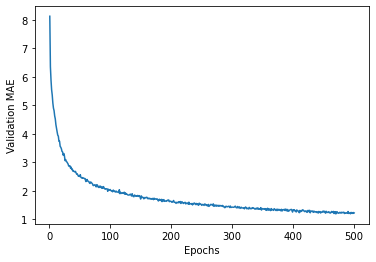

In [28]:
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")